# Анализ рынка заведений общественного питания Москвы

- Автор: Пипченко Александра Сергеевна
- Дата: 24.03.2025

### Цели и задачи проекта

<font color='#777778'>Цель: провести исследовательский анализ рынка Москвы.       
    Задачи:  
- Загрузить данные и познакомиться с их содержимым  
- Провести предобработку данных  
- Провести исследовательский анализ данных  
- Сформулировать выводы по проведённому анализу  
</font>

### Описание данных

<font color='#777778'>Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания:   
      
- name — название заведения;  
- address — адрес заведения;  
- district — административный район, в котором находится заведение, например Центральный административный округ;  
- category — категория заведения, например «кафе», «пиццерия» или «кофейня»;  
- hours — информация о днях и часах работы;  
- rating — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);  
- chain — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):  
- 0 — заведение не является сетевым;  
- 1 — заведение является сетевым.  
- seats — количество посадочных мест.          
            
Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания:  
      
- price — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;  
- avg_bill — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:  
«Средний счёт: 1000–1500 ₽»;  
«Цена чашки капучино: 130–220 ₽»;  
«Цена бокала пива: 400–600 ₽».  
и так далее;  
- middle_avg_bill — число с оценкой среднего чека, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Средний счёт»:  
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.  
- middle_coffee_cup — число с оценкой одной чашки капучино, которое указано только для значений из столбца avg_bill, начинающихся с подстроки «Цена одной чашки капучино»:  
Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.  
Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.  
Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.</font>

### Содержимое проекта

<font color='#777778'>Шаг 1. Загрузка данных и знакомство с ними  
Шаг 2. Предобработка данных  
Шаг 3. Исследовательский анализ данных  
Шаг 4. Итоговый вывод и рекомендации</font>

---

## 1. Загрузка данных и знакомство с ними



In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install phik

,Requirement already satisfied: pandas>=0.25.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.2.4)
,Requirement already satisfied: joblib>=0.14.1 in /opt/conda/lib/python3.9/site-packages (from phik) (1.1.0)
,Requirement already satisfied: scipy>=1.5.2 in /opt/conda/lib/python3.9/site-packages (from phik) (1.9.1)
,Requirement already satisfied: numpy>=1.18.0 in /opt/conda/lib/python3.9/site-packages (from phik) (1.21.1)
,Requirement already satisfied: matplotlib>=2.2.3 in /opt/conda/lib/python3.9/site-packages (from phik) (3.3.4)
,Requirement already satisfied: kiwisolver>=1.0.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (1.4.4)
,Requirement already satisfied: python-dateutil>=2.1 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (2.8.1)
,Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.3 in /opt/conda/lib/python3.9/site-packages (from matplotlib>=2.2.3->phik) (2.4.7)
,Requirement already satisfied: pil

In [3]:
import phik
from phik import resources, report 
from phik.report import plot_correlation_matrix

In [4]:
# Выгружаем данные в переменную df_rest_info
df_rest_info = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')

In [5]:
# Выгружаем данные в переменную df_rest_price
df_rest_price = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [6]:
# Выводим информацию о датафрейме
df_rest_info.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 8406 entries, 0 to 8405
,Data columns (total 9 columns):
, #   Column    Non-Null Count  Dtype  
,---  ------    --------------  -----  
, 0   id        8406 non-null   object 
, 1   name      8406 non-null   object 
, 2   category  8406 non-null   object 
, 3   address   8406 non-null   object 
, 4   district  8406 non-null   object 
, 5   hours     7870 non-null   object 
, 6   rating    8406 non-null   float64
, 7   chain     8406 non-null   int64  
, 8   seats     4795 non-null   float64
,dtypes: float64(2), int64(1), object(6)
,memory usage: 591.2+ KB


In [7]:
# Выводим данные df_rest_info
display(df_rest_info.head())

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [8]:
# Выводим информацию о датафрейме
df_rest_price.info()

<class 'pandas.core.frame.DataFrame'>
,RangeIndex: 4058 entries, 0 to 4057
,Data columns (total 5 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 4058 non-null   object 
, 1   price              3315 non-null   object 
, 2   avg_bill           3816 non-null   object 
, 3   middle_avg_bill    3149 non-null   float64
, 4   middle_coffee_cup  535 non-null    float64
,dtypes: float64(2), object(3)
,memory usage: 158.6+ KB


In [9]:
# Выводим данные df_rest_price
display(df_rest_price.head())

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


---

### Промежуточный вывод



Файл /datasets/rest_info.csv содержит информацию о заведениях общественного питания, всего представлено 8406 строк и 9 столбцов. Названия столбцов корректны, изменения не требуются, названия соответствуют описанию. Пропуски имеются в столбцах hours, seats 

Файл /datasets/rest_price.csv содержит информацию о среднем чеке в заведениях общественного питания, всего представлено 4058 строк и 5 столбцов. Названия столбцов корректны, изменения не требуются, названия соответствуют описанию.  Пропуски имеются во многих столбцах, среди них price, avg_bill, middle_avg_bill, middle_coffee_cup  

### Подготовка единого датафрейма



In [10]:
# Объединяем датафреймы
df = df_rest_info.merge(df_rest_price, on='id', how='left')
display(df)

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN,NaN,NaN,NaN,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0,средние,Средний счёт:от 1000 ₽,1000.0,NaN
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0,средние,Средний счёт:400–600 ₽,500.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8401,0342ad1a45ed41ba89dcba246a8267e5,Суши Мания,кафе,"Москва, Профсоюзная улица, 56",Юго-Западный административный округ,"ежедневно, 09:00–02:00",4.4,0,86.0,NaN,NaN,NaN,NaN
8402,ee6bb7c3650e47bd8186fca08eda1091,Миславнес,кафе,"Москва, Пролетарский проспект, 19, корп. 1",Южный административный округ,"ежедневно, 08:00–22:00",4.8,0,150.0,NaN,NaN,NaN,NaN
8403,62e8c64d4c89467aba608e39ef87616b,Самовар,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",3.9,0,150.0,NaN,Средний счёт:от 150 ₽,150.0,NaN
8404,06a0db5ecd4842d48cd6350aa923e297,Чайхана Sabr,кафе,"Москва, Люблинская улица, 112А, стр. 1",Юго-Восточный административный округ,"ежедневно, круглосуточно",4.2,1,150.0,NaN,NaN,NaN,NaN


## 2. Предобработка данных



In [11]:
# Комментарий ревьюера
# создаем копию датасета до преобразования для возможности проверить сделанные изменения после предобработки
temp = df.copy() 
len(temp)

8406

In [12]:
# Создаем копию датасета
temp = df.copy() 
len(temp)

8406

In [13]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8406 entries, 0 to 8405
,Data columns (total 13 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 8406 non-null   object 
, 1   name               8406 non-null   object 
, 2   category           8406 non-null   object 
, 3   address            8406 non-null   object 
, 4   district           8406 non-null   object 
, 5   hours              7870 non-null   object 
, 6   rating             8406 non-null   float64
, 7   chain              8406 non-null   int64  
, 8   seats              4795 non-null   float64
, 9   price              3315 non-null   object 
, 10  avg_bill           3816 non-null   object 
, 11  middle_avg_bill    3149 non-null   float64
, 12  middle_coffee_cup  535 non-null    float64
,dtypes: float64(4), int64(1), object(8)
,memory usage: 919.4+ KB


В столбце seats (количество посадочных мест) логичнее было бы использовать числовой тип данных integer. Остальные столбцы корректны.

In [14]:
# Заполняем пропуски в столбце seats индикатором "-1", чтобы поменять тип данных
df['seats'] = df['seats'].fillna(-1)
df['seats'] = pd.to_numeric(df['seats'], downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8406 entries, 0 to 8405
,Data columns (total 13 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 8406 non-null   object 
, 1   name               8406 non-null   object 
, 2   category           8406 non-null   object 
, 3   address            8406 non-null   object 
, 4   district           8406 non-null   object 
, 5   hours              7870 non-null   object 
, 6   rating             8406 non-null   float64
, 7   chain              8406 non-null   int64  
, 8   seats              8406 non-null   int16  
, 9   price              3315 non-null   object 
, 10  avg_bill           3816 non-null   object 
, 11  middle_avg_bill    3149 non-null   float64
, 12  middle_coffee_cup  535 non-null    float64
,dtypes: float64(3), int16(1), int64(1), object(8)
,memory usage: 870.2+ KB


In [15]:
# Понижаем разрядность числовых столбцов
df['chain'] = pd.to_numeric(df['chain'], downcast='integer')
for column in ['rating','middle_avg_bill','middle_coffee_cup','seats']:
    df[column] = pd.to_numeric(df[column], downcast='float')
df.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8406 entries, 0 to 8405
,Data columns (total 13 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 8406 non-null   object 
, 1   name               8406 non-null   object 
, 2   category           8406 non-null   object 
, 3   address            8406 non-null   object 
, 4   district           8406 non-null   object 
, 5   hours              7870 non-null   object 
, 6   rating             8406 non-null   float32
, 7   chain              8406 non-null   int8   
, 8   seats              8406 non-null   int16  
, 9   price              3315 non-null   object 
, 10  avg_bill           3816 non-null   object 
, 11  middle_avg_bill    3149 non-null   float32
, 12  middle_coffee_cup  535 non-null    float32
,dtypes: float32(3), int16(1), int8(1), object(8)
,memory usage: 714.2+ KB


In [16]:
# Изучим количество пропусков
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                   0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [17]:
# Изучим количество пропусков в долях
df.isna().sum()/df.shape[0]

id                   0.000000
name                 0.000000
category             0.000000
address              0.000000
district             0.000000
hours                0.063764
rating               0.000000
chain                0.000000
seats                0.000000
price                0.605639
avg_bill             0.546039
middle_avg_bill      0.625387
middle_coffee_cup    0.936355
dtype: float64

В столбцах seats, price, avg_bill, middle_avg_bill, middle_coffee_cup наблюдается более 40% пропусков. Заполнение пропусков может привести к искажению результатов, поэтому сделаем это только для столбцов hours и seats, в котором не так много пропусков. Замену будем осуществлять путем заполнения индикатором "нет данных".  
Его говорить о причинах пропусков в данных, то можно назвать несколько:  
- В столбце hours не так много пропусков, этому могут способствовать случайные ошибки при вводе данных (тип MCAR). Также возможны технические сбои при записи данных, например, кратковременный сбой мог привести к потере некоторых данных (также тип MCAR).   
- В данных с количеством посадочных мест могут быть пропущены данные и это связано с сезонностью, поскольку, например, летние кафе могут не указывать количество мест внутри помещения, так как основные места находятся на улице (тип MAR). 


In [19]:
# Заменим пропуски в столбце hours индикатором "нет данных" 
df['hours'] = df['hours'].fillna('нет данных')
df.info()

<class 'pandas.core.frame.DataFrame'>
,Int64Index: 8406 entries, 0 to 8405
,Data columns (total 13 columns):
, #   Column             Non-Null Count  Dtype  
,---  ------             --------------  -----  
, 0   id                 8406 non-null   object 
, 1   name               8406 non-null   object 
, 2   category           8406 non-null   object 
, 3   address            8406 non-null   object 
, 4   district           8406 non-null   object 
, 5   hours              8406 non-null   object 
, 6   rating             8406 non-null   float32
, 7   chain              8406 non-null   int8   
, 8   seats              8406 non-null   int16  
, 9   price              3315 non-null   object 
, 10  avg_bill           3816 non-null   object 
, 11  middle_avg_bill    3149 non-null   float32
, 12  middle_coffee_cup  535 non-null    float32
,dtypes: float32(3), int16(1), int8(1), object(8)
,memory usage: 714.2+ KB


In [20]:
# Выводим уникальные значения столбца name и их количество
counts_unique = df['name'].unique()
counts_nunique = df['name'].nunique()
len_df = len(df)
dupl = df.duplicated().sum()
print(f"Уникальные значения в столбце name: {counts_unique}")
print(f"Количество уникальных значений в столбце name: {counts_nunique}")
print(f'Всего строк: {len_df}')
print(f'Количество явных дубликатов: {dupl}')

Уникальные значения в столбце name: ['WoWфли' 'Четыре комнаты' 'Хазри' ... 'Миславнес' 'Самовар' 'Kebab Time']
,Количество уникальных значений в столбце name: 5614
,Всего строк: 8406
,Количество явных дубликатов: 0


In [21]:
# Приводим данные столбца name в нижний регистр, выводим уникальные значения и их количество
df['name'] = df['name'].str.lower()
counts_unique = df['name'].unique()
counts_nunique = df['name'].nunique()
len_df = len(df)
dupl = df.duplicated().sum()
print(f"Уникальные значения в столбце name: {counts_unique}")
print(f"Количество уникальных значений в столбце name: {counts_nunique}")
print(f'Всего строк: {len_df}')
print(f'Количество явных дубликатов: {dupl}')

Уникальные значения в столбце name: ['wowфли' 'четыре комнаты' 'хазри' ... 'миславнес' 'самовар' 'kebab time']
,Количество уникальных значений в столбце name: 5512
,Всего строк: 8406
,Количество явных дубликатов: 0


In [22]:
# Ищем явные дубликаты по двум стобцам
dupl = df[['name', 'address']].duplicated(keep=False)
rows= df[df[['name', 'address']].duplicated(keep=False)]
summa = dupl.sum()
display(dupl)
print(summa)
print(rows[['name', 'address']])

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403    False
8404    False
8405    False
Length: 8406, dtype: bool

6
,                           name                                  address
,1430                  more poke  Москва, Волоколамское шоссе, 11, стр. 2
,1511                  more poke  Москва, Волоколамское шоссе, 11, стр. 2
,2211  раковарня клешни и хвосты               Москва, проспект Мира, 118
,2420  раковарня клешни и хвосты               Москва, проспект Мира, 118
,3091            хлеб да выпечка              Москва, Ярцевская улица, 19
,3109            хлеб да выпечка              Москва, Ярцевская улица, 19


Обнаружено 3 дубликата по столбцам name и address

In [23]:
# Удаляем дубликаты по двум стобцам
df.drop_duplicates(subset=['name', 'address'], inplace=True)

В датафрейме нет полных дубликатов строк

In [24]:
# Проверяем неявные дубликаты в датафрейме 
df.duplicated(subset='id').sum()

0

Значения по id уникальны, то есть каждая строка в данных — уникальный клиент

In [25]:
# Создаем новый столбец is_24_7, в котором значение True  принадлежит заведениям, которые работают ежедневно и круглосуточно
df['is_24_7'] = df['hours'] == 'ежедневно, круглосуточно'
print(df[['hours', 'is_24_7']].head(15))  

                                                hours  is_24_7
,0                              ежедневно, 10:00–22:00    False
,1                              ежедневно, 10:00–22:00    False
,2   пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...    False
,3                              ежедневно, 09:00–22:00    False
,4                              ежедневно, 10:00–22:00    False
,5                              ежедневно, 10:00–23:00    False
,6                   пн 15:00–04:00; вт-вс 15:00–05:00    False
,7   пн-чт 10:00–22:00; пт,сб 10:00–23:00; вс 10:00...    False
,8                              ежедневно, 10:00–22:00    False
,9                              ежедневно, 12:00–00:00    False
,10                           ежедневно, круглосуточно     True
,11                             ежедневно, 10:00–21:00    False
,12                                  вт-сб 09:00–18:00    False
,13                             ежедневно, 08:00–22:00    False
,14                             ежедневно

In [26]:
# Проверяем количество уникальных значений в столбце is_24_7
df['is_24_7'].value_counts()

False    7673
True      730
Name: is_24_7, dtype: int64

In [27]:
# Проверим количество удаленных строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
, Осталось строк в датасете после обработки 8403 
, Удалено строк в датасете после обработки 3 
, Процент потерь 0.04


In [28]:
# Комментарий ревьюера
df['is_24_7'].value_counts()

False    7673
True      730
Name: is_24_7, dtype: int64

In [29]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8406 
, Осталось строк в датасете после обработки 8403 
, Удалено строк в датасете после обработки 3 
, Процент потерь 0.04


---

### Промежуточный вывод



После изучения количества пропусков оказалось, что в столбцах seats, price, avg_bill, middle_avg_bill, middle_coffee_cup наблюдается более 40% пропусков. В процессе предобработки данных были заполнены пропуски в столбцах seats (индикатором "-1") и hours (индикатором "нет данных"). Также был изменен тип данных в столбце seats на целочисленный. Остальные пропуски не были заполнены, поскольку их количество слишком большое, и замена может исказить результаты. Также было обнаружено 3 явных дубликата, далее они были удалены

## 3. Исследовательский анализ данных


---

### Задача 1


In [30]:
# Изучим количество уникальных значений в каждой категории
counts_category = df['category'].value_counts()
display(counts_category)

кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [31]:
# Изучим долю уникальных значений в каждой категории
share_category = df['category'].value_counts()/df.shape[0]
display(share_category)

кафе               0.282875
ресторан           0.243008
кофейня            0.168154
бар,паб            0.090920
пиццерия           0.075330
быстрое питание    0.071760
столовая           0.037487
булочная           0.030465
Name: category, dtype: float64

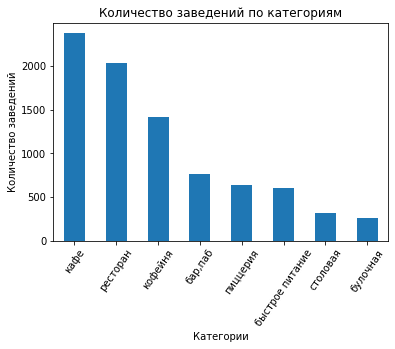

In [32]:
# Визуализируем распределение в столбце category:
df['category'].value_counts().plot(kind='bar', title='Количество заведений по категориям', rot=55, xlabel='Категории', ylabel='Количество заведений')
plt.show()

По столбчатой диаграмме можно наблюдать преобладание кафе (2377), ресторанов (2042) и кофеен(1413). Их доля составляет 0.28, 0.24 и 0.17 соответственно. Меньше всего булочных (256, доля 0.03)

---

### Задача 2


In [33]:
# Изучим количество заведений по административным районам
counts_district = df['district'].value_counts()
display(counts_district)

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [34]:
# Изучим долю заведений по административным районам
share_district = df['district'].value_counts()/df.shape[0]
display(share_district)

Центральный административный округ         0.266809
Северный административный округ            0.106986
Южный административный округ               0.106153
Северо-Восточный административный округ    0.105915
Западный административный округ            0.101154
Восточный административный округ           0.094966
Юго-Восточный административный округ       0.084970
Юго-Западный административный округ        0.084375
Северо-Западный административный округ     0.048673
Name: district, dtype: float64

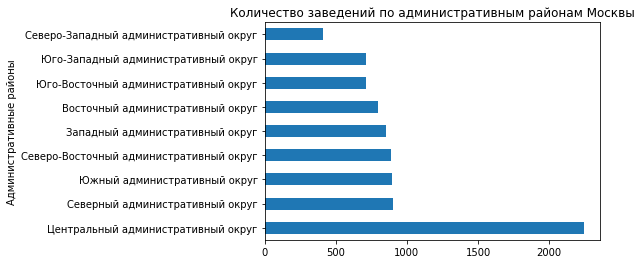

In [35]:
# Визуализируем распределение в столбце district:
df['district'].value_counts().plot(kind='barh', title='Количество заведений по административным районам Москвы', xlabel='Административные районы', ylabel='Количество заведений') 
plt.show()

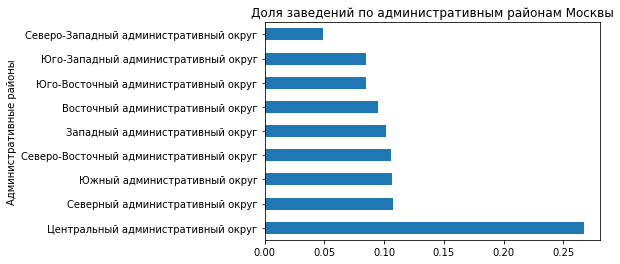

In [36]:
# Визуализируем распределение в столбце district в долях:
share_districts = df['district'].value_counts()/df.shape[0]
share_districts.plot(kind='barh', title='Доля заведений по административным районам Москвы', xlabel='Административные районы', ylabel='Количество заведений') 
plt.show()

По столбчатой диаграмме можно наблюдать преобладание Центрального административного округа по количеству заведений

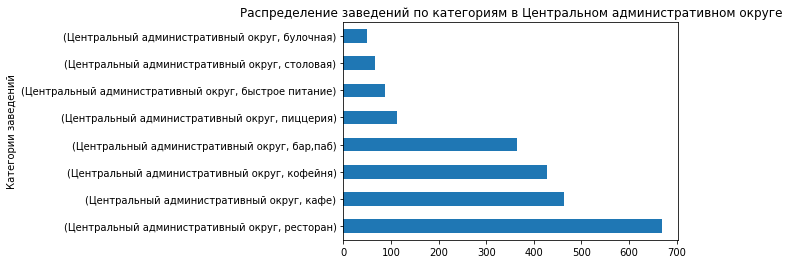

In [37]:
# Визуализируем распределение заведений по категориям в Центральном административном округе
centre = df[df['district']=='Центральный административный округ']
groupby_centre = centre.groupby('district')['category'].value_counts()
groupby_centre.plot(kind='barh', title='Распределение заведений по категориям в Центральном административном округе', xlabel='Категории заведений', ylabel='Количество заведений')
plt.show()

In [38]:
# Выведем информацию о количестве заведений по категориям в Центральном административном округе
display(groupby_centre)

district                            category       
Центральный административный округ  ресторан           670
                                    кафе               464
                                    кофейня            428
                                    бар,паб            364
                                    пиццерия           113
                                    быстрое питание     87
                                    столовая            66
                                    булочная            50
Name: category, dtype: int64

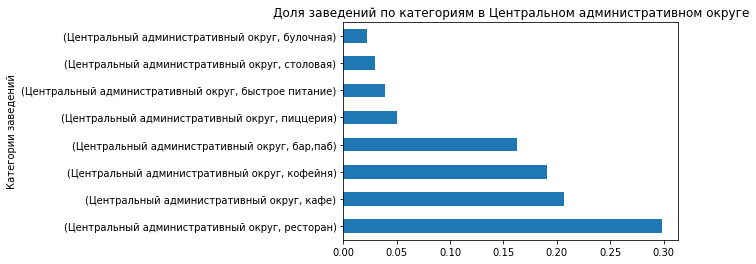

In [39]:
# Визуализируем распределение доли заведений по категориям в Центральном административном округе
groupby_centre_share = centre.groupby('district')['category'].value_counts()/centre.shape[0]
groupby_centre_share.plot(kind='barh', title='Доля заведений по категориям в Центральном административном округе', xlabel='Категории заведений', ylabel='Доля заведений')
plt.show()

In [40]:
# Выведем информацию о долях заведений по категориям в Центральном административном округе
display(groupby_centre_share)

district                            category       
Центральный административный округ  ресторан           0.298840
                                    кафе               0.206958
                                    кофейня            0.190901
                                    бар,паб            0.162355
                                    пиццерия           0.050401
                                    быстрое питание    0.038805
                                    столовая           0.029438
                                    булочная           0.022302
Name: category, dtype: float64

В центральном административном округе преобладают рестораны (670), их доля составляет 0.29. Меньше всего булочных (50), их доля 0.02

---

### Задача 3


In [41]:
# Выведем информацию и долях сетевых и несетевых заведений
df['chain'].value_counts(normalize=True)

0    0.618827
1    0.381173
Name: chain, dtype: float64

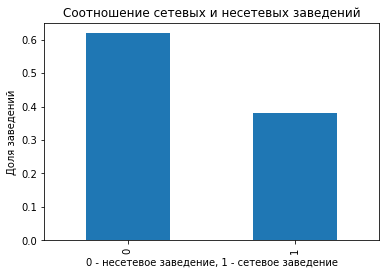

In [42]:
# Визуализируем соотношение долей сеетвых и несетевых заведений
df['chain'].value_counts(normalize=True).plot(kind='bar', title='Соотношение сетевых и несетевых заведений', xlabel='0 - несетевое заведение, 1 - сетевое заведение', ylabel='Доля заведений')
plt.show()

В целом больше несетевых заведений, их доля составляет 0.62. Доля же сетевых равняется 0.38

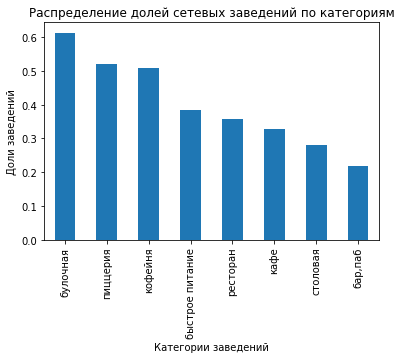

In [43]:
# Визуализируем распределение долей сетевых заведений
share_set = df.groupby('category')['chain'].value_counts(normalize=True).unstack()
share_set = share_set.sort_values(by=1, ascending=False)
share_set[1].plot(kind='bar', xlabel='Категории заведений', ylabel='Доли заведений', title='Распределение долей сетевых заведений по категориям')
plt.show()

In [44]:
# Выведем информацию о долях сетевых заведений
display(share_set[1])

category
булочная           0.613281
пиццерия           0.521327
кофейня            0.509554
быстрое питание    0.384743
ресторан           0.357003
кафе               0.327724
столовая           0.279365
бар,паб            0.219895
Name: 1, dtype: float64

Можно заметить, что наблюдается больше несетевых заведений. Самую большую долю сетевых заведений занимают булочные (0.61), далее пиццерии и кофейни с относительно равными долями (0.52 и 0.51). Меньшая доля принадлежит барам/пабам и составляет 0.22

---

### Задача 4



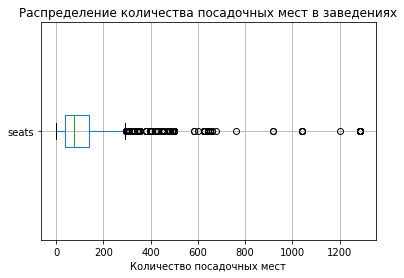

In [45]:
# Отфлильтруем заполненные заглушкой "-1" данные и визуализируем распределение количества посадочных мест в заведениях
filter_seats = df[df['seats'] != -1]
filter_seats.boxplot(column='seats', vert=False)
plt.title('Распределение количества посадочных мест в заведениях')
plt.xlabel('Количество посадочных мест')
plt.show()

По диаграмме размаха видно, что в данных по количеству посадочных мест наблюдается большое число выбросов в большую сторону, а также правоассимитричное распределение

In [46]:
# Изучим статистические показатели столбца seats
filter_seats['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

По статистическим показателям столбца seats можно заметить, что среднее значение равняется 108.4, медиана = 75, при этом отклонение от среднего составляет 122.8. Таким образом, в данных присутствуют выбросы, которые значительно увеличивают среднее значение

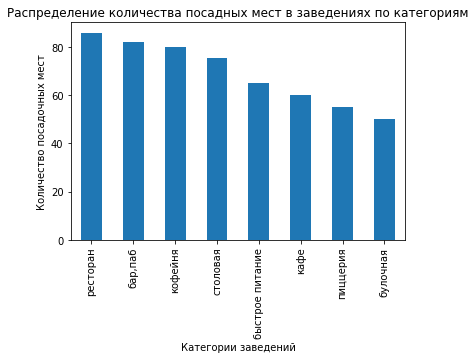

category
,ресторан           86.0
,бар,паб            82.0
,кофейня            80.0
,столовая           75.5
,быстрое питание    65.0
,кафе               60.0
,пиццерия           55.0
,булочная           50.0
,Name: seats, dtype: float64


In [47]:
# Визуализируем распределение типичного количества посадочных мест в заведениях по категориям
groupby_seats = filter_seats.groupby('category')['seats'].median()
groupby_seats = groupby_seats.sort_values(ascending=False)
groupby_seats.plot(kind='bar', xlabel='Категории заведений', ylabel='Количество посадочных мест', title='Распределение количества посадных мест в заведениях по категориям')
plt.show()
print(groupby_seats)

В основном больше всего посадочных мест в ресторанах и барах/пабах, а именно 86 и 82 соответственно. В пиццериях и булочных самое маленькое количество мест среди категорий заведений (55 и 50)

---

### Задача 5



In [48]:
# Изучим статистические показатели столбца rating
df['rating'].describe()

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

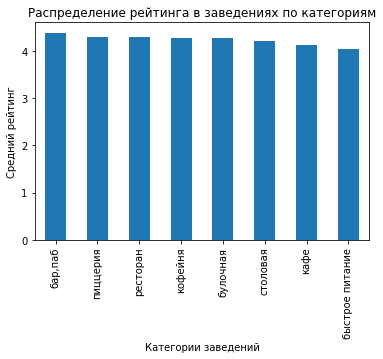

In [49]:
# Визуализируем распределение среднего рейтинга в заведениях по категориям
groupby_rating = df.groupby('category')['rating'].mean()
groupby_rating = groupby_rating.sort_values(ascending=False)
groupby_rating.plot(kind='bar', xlabel='Категории заведений', ylabel='Средний рейтинг', title='Распределение рейтинга в заведениях по категориям')
plt.show()

In [50]:
# Выведем данные о средних рейтингах по категориям
display(groupby_rating)

category
бар,паб            4.387696
пиццерия           4.301264
ресторан           4.290401
кофейня            4.277282
булочная           4.268359
столовая           4.211429
кафе               4.123896
быстрое питание    4.050249
Name: rating, dtype: float32

In [51]:
# Рассмотрим статистические показатели категорий заведений по рейтингу
describe_rating = df.groupby('category')['rating'].describe()
display(describe_rating)

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
"бар,паб",764.0,4.387697,0.380392,1.1,4.3,4.4,4.6,5.0
булочная,256.0,4.268360,0.386303,1.3,4.2,4.3,4.4,5.0
быстрое питание,603.0,4.050249,0.560949,1.1,3.9,4.2,4.3,5.0
кафе,2377.0,4.123896,0.566200,1.0,4.0,4.2,4.4,5.0
кофейня,1413.0,4.277282,0.372250,1.4,4.1,4.3,4.4,5.0
пиццерия,633.0,4.301264,0.336162,1.0,4.2,4.3,4.4,5.0
ресторан,2042.0,4.290401,0.413143,1.0,4.2,4.3,4.5,5.0
столовая,315.0,4.211429,0.454205,1.0,4.1,4.3,4.4,5.0


В общем сильных различий по усредненным рейтингам для разных типов заведений не наблюдается

---

### Задача 6


In [52]:
# Создадим копию датасета 
copy_df = df.copy() 

In [53]:
copy_df['seats'] = copy_df['seats'].replace(-1, )

interval columns not set, guessing: ['rating', 'chain', 'seats']


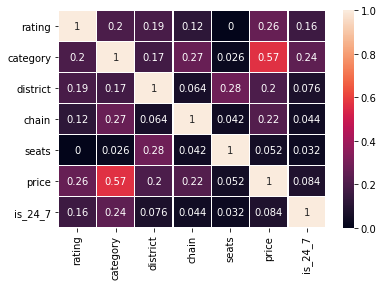

            rating  category  district     chain     seats     price   is_24_7
,rating    1.000000  0.198917  0.189389  0.119061  0.000000  0.262056  0.160864
,category  0.198917  1.000000  0.174541  0.266054  0.026395  0.566933  0.244787
,district  0.189389  0.174541  1.000000  0.064459  0.284296  0.202787  0.076370
,chain     0.119061  0.266054  0.064459  1.000000  0.041659  0.218211  0.043535
,seats     0.000000  0.026395  0.284296  0.041659  1.000000  0.052322  0.032041
,price     0.262056  0.566933  0.202787  0.218211  0.052322  1.000000  0.084183
,is_24_7   0.160864  0.244787  0.076370  0.043535  0.032041  0.084183  1.000000


In [55]:
# Построим корреляционную матрицу 
matrix_phik = copy_df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix()
sns.heatmap(matrix_phik, annot=True, linewidths=0.5)
plt.show()
print(matrix_phik)

Чтобы изучить корреляцию рейтинга заведения с другими данными, обратимся к первому столбцу. Сильнее всего корреляция рейтинга с ценовой категорией (0.26)

In [56]:
# Комментарий ревьюера 2
df['seats'].value_counts()[:2]

-1     3611
 40     253
Name: seats, dtype: int64

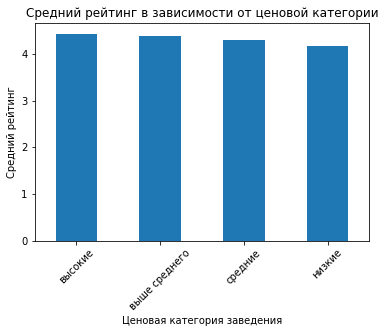

In [57]:
# Для проверки связи сгруппируем данные по ценовой категории и построим столбчатую диаграмму
groupby_rating_and_price = copy_df.groupby('price')['rating'].mean()
groupby_rating_and_price = groupby_rating_and_price.sort_values(ascending=False)
groupby_rating_and_price.plot(kind='bar', xlabel='Ценовая категория заведения', ylabel='Средний рейтинг', title='Средний рейтинг в зависимости от ценовой категории', rot=45)
plt.show()

In [58]:
# Выведем информацию о среднем рейтинге в каждой ценовой категории
display(groupby_rating_and_price)

price
высокие          4.436611
выше среднего    4.386348
средние          4.297874
низкие           4.173077
Name: rating, dtype: float32

Можно заметить, что у более дорогих заведений рейтинг выше, таким образом, рейтинг действительно зависит от ценовой категории

---

### Задача 7


In [59]:
# Найдем топ-15 популярных сетей в Москве по количеству заведений, а также их рейтинг
df_set = df[df['chain']==1]
top = df_set[['name', 'rating', 'category']]
top = df_set.groupby(['name', 'category']).agg({'rating': 'mean', 'name': 'count'})
top = top.rename(columns={'name': 'counts'})
sort_top = top.sort_values(by='counts', ascending=False)
display(sort_top.head(15))

,,rating,counts
name,category,,
шоколадница,кофейня,4.178151,119
домино'с пицца,пиццерия,4.169737,76
додо пицца,пиццерия,4.286487,74
one price coffee,кофейня,4.064789,71
яндекс лавка,ресторан,3.872464,69
cofix,кофейня,4.075385,65
prime,ресторан,4.114285,49
кофепорт,кофейня,4.147619,42
кулинарная лавка братьев караваевых,кафе,4.394872,39


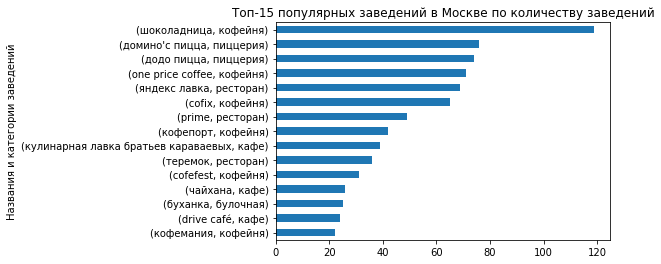

In [60]:
# Построим диаграмму топ-15 заведений по количеству
sort_top = sort_top[0:15]
sort_top =sort_top.sort_values(by='counts')
sort_top['counts'].plot(kind='barh', xlabel='Названия и категории заведений', ylabel='Количество заведений', title='Топ-15 популярных заведений в Москве по количеству заведений')
plt.show()

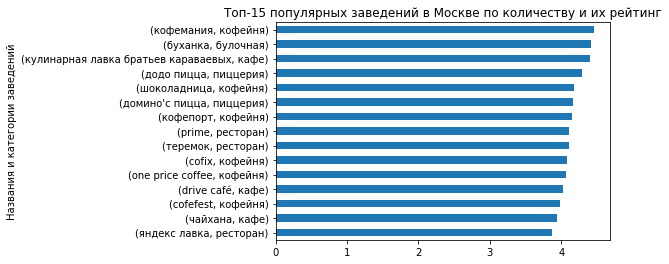

In [61]:
# Построим диаграмму топ-15 заведений с их рейтингом
sort_top = sort_top[0:15]
sort_top =sort_top.sort_values(by='rating')
sort_top['rating'].plot(kind='barh', xlabel='Названия и категории заведений', ylabel='Рейтинг заведений', title='Топ-15 популярных заведений в Москве по количеству и их рейтинг')
plt.show()

Первое место в топе занимают кофейни Шоколадница, их количество составляет 119, а рейтинг 4.18.  На последнем месте находятся кофейни Кофемания, с количеством заведений 22 и рейтингом 4.46 (самый высокий рейтинг среди топа). Самый низкий рейтинг наблюдается в ресторанах Яндекс лавки, он равен 3.87 

---

### Задача 8


In [62]:
# Выведем статистические показатели для столбца middle_avg_bill
df['middle_avg_bill'].describe()

count     3149.000000
mean       958.053650
std       1009.732849
min          0.000000
25%        375.000000
50%        750.000000
75%       1250.000000
max      35000.000000
Name: middle_avg_bill, dtype: float64

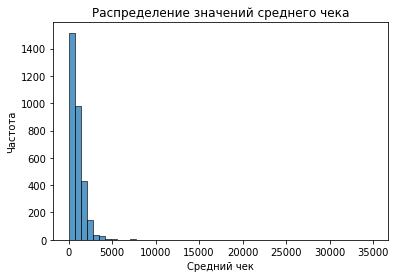

In [63]:
# Построим гистограмму, чтобы посмотреть на распределение значений среднего чека
sns.histplot(data=df, x='middle_avg_bill', bins=50)
plt.title('Распределение значений среднего чека')
plt.ylabel('Частота')
plt.xlabel('Средний чек')
plt.show()

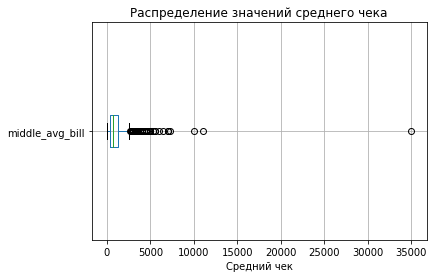

In [64]:
# Визуаилизируем распределение значений среднего чека
df.boxplot(column='middle_avg_bill', vert=False)
plt.title('Распределение значений среднего чека')
plt.xlabel('Средний чек')
plt.show()

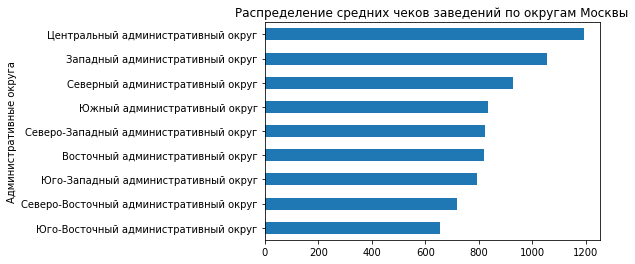

In [65]:
# Посмотрим средние чеки заведений по округам Москвы, построив диаграмму
groupby_bill = df.groupby('district')['middle_avg_bill'].mean()
groupby_bill = groupby_bill.sort_values()
groupby_bill.plot(kind='barh', xlabel='Административные округа', ylabel='Средний чек', title='Распределение средних чеков заведений по округам Москвы')
plt.show()

In [66]:
display(groupby_bill.sort_values(ascending=False))

district
Центральный административный округ         1191.057495
Западный административный округ            1053.225464
Северный административный округ             927.959656
Южный административный округ                834.398071
Северо-Западный административный округ      822.222900
Восточный административный округ            820.626953
Юго-Западный административный округ         792.561707
Северо-Восточный административный округ     716.611267
Юго-Восточный административный округ        654.097961
Name: middle_avg_bill, dtype: float32

In [67]:
# Рассчитаем медиану и среднее значение чека по административным округам
stat_district = df.groupby('district')['middle_avg_bill'].agg(['median', 'mean'])
stat_district = stat_district.sort_values(by='median', ascending=False)
display(stat_district)

,median,mean
district,,
Западный административный округ,1000.0,1053.225464
Центральный административный округ,1000.0,1191.057495
Северо-Западный административный округ,700.0,822.222900
Северный административный округ,650.0,927.959656
Юго-Западный административный округ,600.0,792.561707
Восточный административный округ,575.0,820.626953
Северо-Восточный административный округ,500.0,716.611267
Южный административный округ,500.0,834.398071
Юго-Восточный административный округ,450.0,654.097961


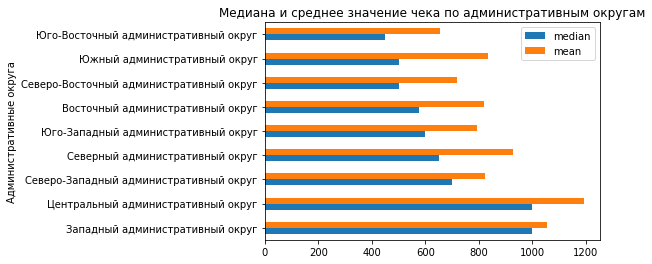

In [68]:
# Визуализируем медиану и среднее значение чека по административным округам
stat_district.plot(kind='barh', xlabel='Административные округа', ylabel='Среднее значение/медиана', title='Медиана и среднее значение чека по административным округам')
plt.show()

Самый высокий средний чек наблюдается в Центральном административном округе и составляет 1191.06. Это объясняется тем, что данный округ включает в себя деловые и туристичесике места, где расположены высококлассные заведения, также именно в этом районе проживают люди с высоким уровнем дохода. Также к высоким значениям можно отнести Западный административный округ (1053.23). В остальных округах сумма среднего чека не превышает 1000. В Юго-Восточном округе зафиксирована наименьшая сумма (654.09), поскольку и заведений в данном округе не так много, и соответственно, спрос невысок.

---

### Промежуточный вывод



В процессе исследовательского анализа данных было сделано и выявлено следующее:  

Изучение представленных категорий заведений и количество объектов в каждой категории: больше всего заведений таких категорий, как кафе и расторан, меньше всего - столовая и булочная

Изучение административных округов и распределение количества заведений в них: в Центральном административном округе самое большое количество заведений, а именно 2242. Самое маленькое количество наблюдается в Северо-Западном округе (409) 

Изучение соотношения сетевых и несетевых заведений: в Центральном административном округе самое большое количество заведений, а именно 2242. Самое маленькое количество наблюдается в Северо-Западном округе (409)

В Центральном округе наибольшее количество принадлежит ресторанам (670), а наименьшее - булочным (50)  

Изучение количества посадочных мест, рейтинга и среднего чека: Больше всего посадочных мест находится в ресторанах, меньше всего - в булочных. Средний рейтинг заведений по категориям сильных различий не имеет. Самый высокий средний чек принадлежит Центральному округу, поскольку именно в этом районе много туристов и туристических мест, а также высококлассных заведений   

Поиск топ-15 заведений по популярности: первое место принадлежит кофейням Шоколадница, последнее - кофейням Кофемания  

## 4. Итоговый вывод и рекомендации

Целью проекта было проведение исследовательского анализа рынка заведений общественного питания Москвы. После выполнения задач исследования, а именно выгрузки и знакомства с данными, предобработки и непосредственно исследовательского анализа, были сформулированы выводы и рекомендации, речь о которых пойдет далее.  

В данных было обнаружено довольно большое количество пропусков в столбцах, содержащих информацию о количестве посадочных мест (seats), ценовой категории (price), среднего чека (avg_bill), числе с оценкой среднего чека (middle_avg_bill) и числе с оценкой одной чашки капучино (middle_coffee_cup). Было принято решение заполнить пропуски с столбцах seats и hours заглушками/индикаторами. Также в столбцах rating, middle_avg_bill, middle_coffee_cup, seats было осуществлено понижение разрядности. Выяснилось, что в данных присутствует 3 дубликата по двум столбцам (названию заведения и адресу), которые впоследствии были удалены.    

Благодаря анализу можно сделать следующие выводы:  

Самое маленькое количество заведений среди категорий принадлежит булочным и столовым, таким образом, у людей мало выбора, и новое заведение будет пользоваться спросом  

В Северо-западном административном округе самое маленькое количество заведений, в данном случае аналогично, у людей не так много заведений для посещения, поэтому можно было бы рассмотреть это место для открытия заведения  

Если рассматривать Центральный административный округ, то там снова наблюдается самое маленькое количество столовых и булочных, на это также можно обратить внимание  

Среди самых популярных заведений в основном такие категории, как кафе, кофейня, пиццерия и ресторан. Таким образом, эти категории заведений пользуются наибольшим спросом  